In [1]:
import pandas as pd
import pyfolio as pf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


/Users/rafinazamodeen/opt/anaconda3/envs/pyfolioenv/lib/python3.7/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [2]:
sp = pd.read_csv(Path('./sp_tsx_history.csv'),index_col='Date', parse_dates=True, infer_datetime_format=True).dropna()
sp['Close'] = sp['Close'].str.replace('$', '')
sp['Close'] = sp['Close'].str.replace(',', '').astype(float)
sp['sp_return']=sp['Close'].pct_change()

sp.drop(columns=['Close'], inplace=True)
sp.dropna(how='all')
#calculate sp return
sp.head()

/Users/rafinazamodeen/opt/anaconda3/envs/pyfolioenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,sp_return
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


Start date,2012-10-01
End date,2019-12-30
Total months,86
,Backtest
Annual return,4.589%
Cumulative returns,38.224%
Annual volatility,10.536%
Sharpe ratio,0.48
Calmar ratio,0.19
Stability,0.67
Max drawdown,-24.362%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,24.36,2014-09-03,2016-01-20,2017-02-10,638
1,16.82,2018-07-12,2018-12-24,2019-04-18,201
2,8.40,2018-01-04,2018-02-09,2018-06-20,120
3,8.09,2013-03-12,2013-06-24,2013-09-18,137
4,6.10,2017-02-21,2017-08-21,2017-10-27,179


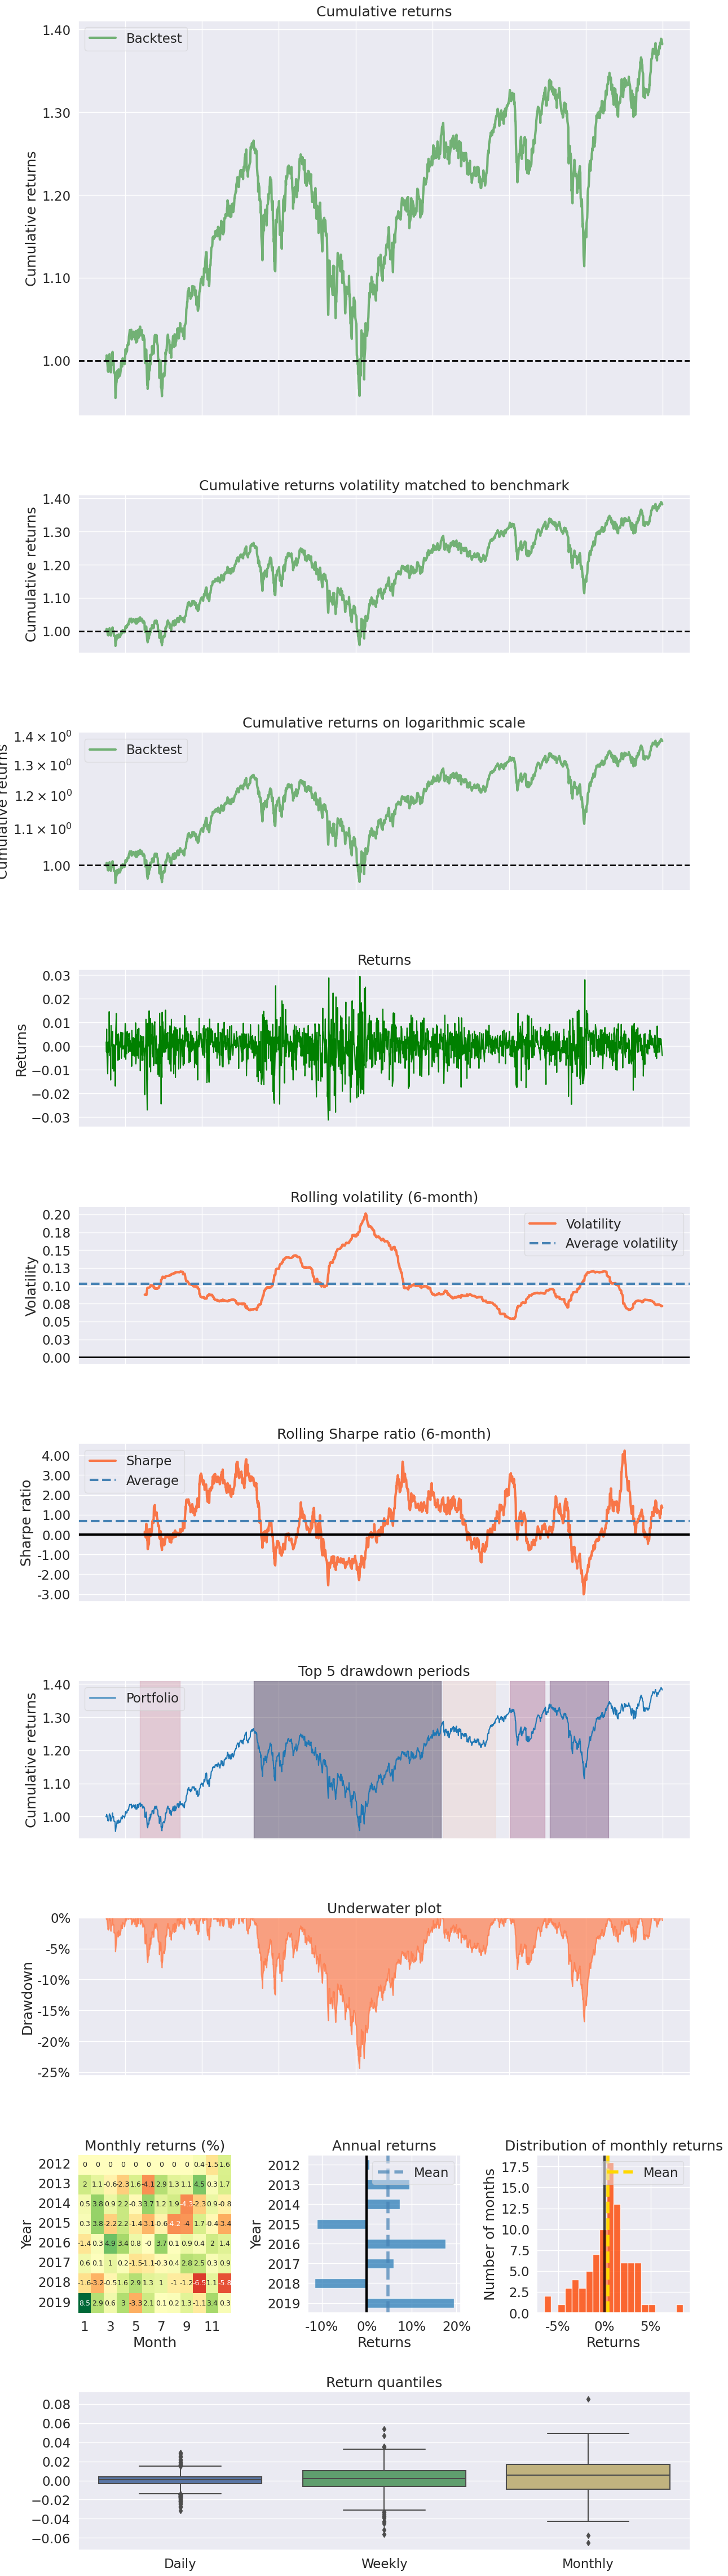

In [3]:
#df = pd.DataFrame({'dates':sp.iloc[:,0],'col':sp.iloc[:,1]})
#df = df.set_index('dates')
pf.create_returns_tear_sheet(sp['sp_return'])

# 1. Annual volatility: is variance 	
#  2. Sortino ratio:  similar to sharpe ratio by focus more on negative standard deviation (the higher the better )
# 3. maximum drawdown: maximum observed loss
# 4. Omega ratio: probability weighted upside divided by the probability weighed downside

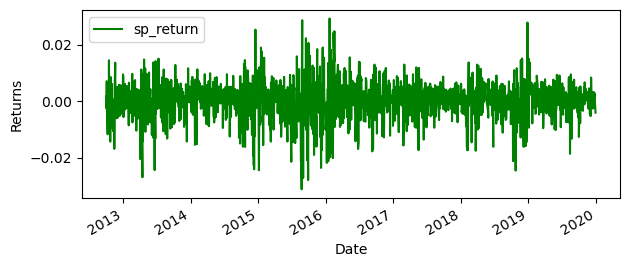

In [4]:
plt.subplot(2,1,2)
pf.plotting.plot_returns(sp)
plt.tight_layout()

<AxesSubplot:title={'center':'Annual returns'}, xlabel='Returns', ylabel='Year'>

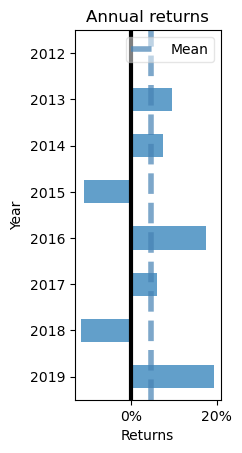

In [5]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(sp)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

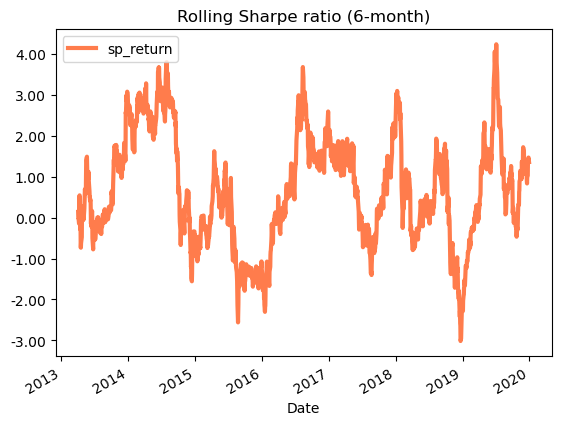

In [6]:
pf.plot_rolling_sharpe(sp)

/Users/rafinazamodeen/opt/anaconda3/envs/pyfolioenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


TypeError: cannot do slice indexing on DatetimeIndex with these indexers [Close   2012-10-01
dtype: datetime64[ns]] of type Series

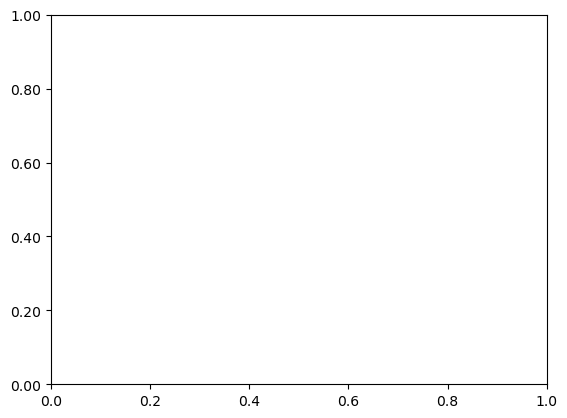

In [7]:
sp1 = pd.read_csv(Path('./sp_tsx_history.csv'),index_col='Date', parse_dates=True, infer_datetime_format=True).dropna()
sp1['Close'] = sp1['Close'].str.replace('$', '')
sp1['Close'] = sp1['Close'].str.replace(',', '').astype(float)
pf.plot_drawdown_periods(sp1)
#not working due to library issue

In [ ]:
# pip uninstall pyfolio

In [ ]:
# pip install git+https://github.com/quantopian/pyfolio